In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
x1 = [4, 8, 13, 7]
x2 = [11, 4, 5, 14]

In [3]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
print(f"x1_mean = {x1_mean}\nx2_mean = {x2_mean}")

x1_mean = 8.0
x2_mean = 8.5


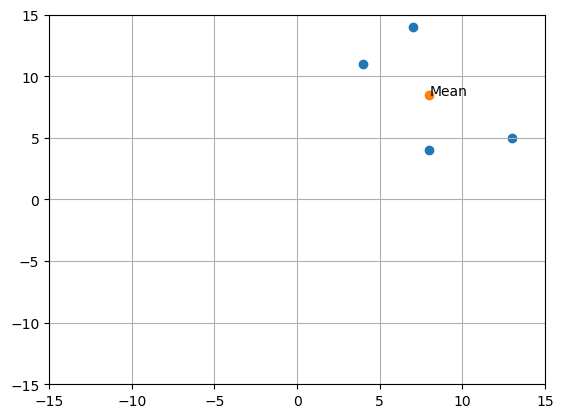

In [4]:
plt.scatter(x1, x2)
plt.scatter(x1_mean, x2_mean, label="Mean")
plt.annotate("Mean", (x1_mean, x2_mean))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid()
plt.show()

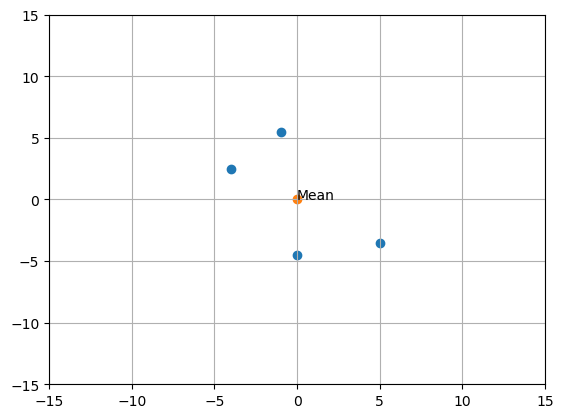

In [5]:
x1_centered = np.array(x1-x1_mean)
x2_centered = np.array(x2-x2_mean)
x1c_mean = np.mean(x1_centered)
x2c_mean = np.mean(x2_centered)

plt.scatter(x1_centered, x2_centered)
plt.scatter(x1c_mean, x2c_mean, label="Mean")
plt.annotate("Mean", (x1c_mean, x2c_mean))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.grid()
plt.show()

In [6]:
cov_matrix = np.cov(np.array((x1, x2)))
print(f"Covariance matrix\n{cov_matrix}")

Covariance matrix
[[ 14. -11.]
 [-11.  23.]]


Eigen values = [30.38486432  6.61513568]
Eigen vectors
[[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]


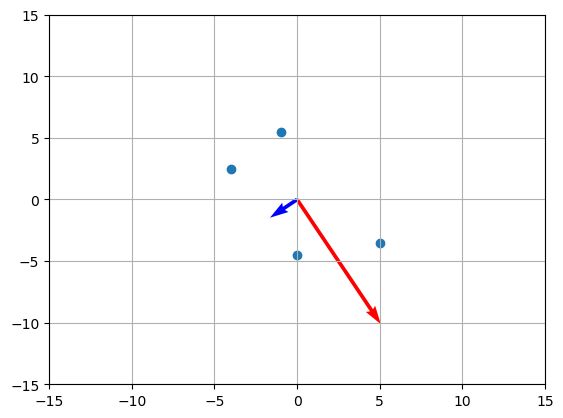

In [7]:
eigenvalues, eigenvectors = eig(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(f"Eigen values = {eigenvalues}\nEigen vectors\n{eigenvectors}")

plt.scatter(x1_centered, x2_centered)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.quiver(0, 0, eigenvectors[0][0], eigenvectors[0][1], scale=(100/30.3), color='r')
plt.quiver(0, 0, eigenvectors[1][0], eigenvectors[1][1], scale=(100/6.6), color='b')
plt.grid()
plt.show()

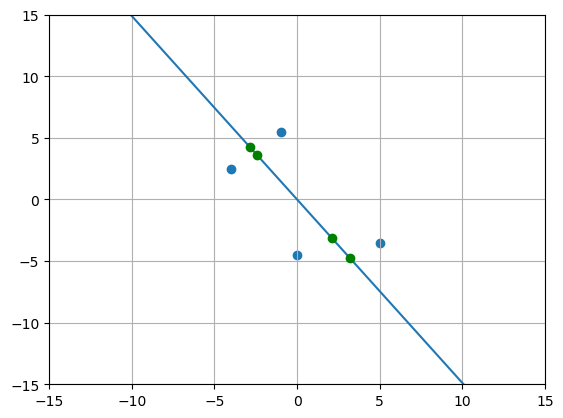

In [10]:
def get_foot(p, a, b):
    ap = p - a
    ab = b - a
    result = a + np.dot(ap, ab)/np.dot(ab, ab) * ab
    return result

foot = get_foot((x1_centered[0], x2_centered[0]), np.array([0, 0]), (eigenvectors[0][0], eigenvectors[0][1]))

plt.scatter(x1_centered, x2_centered)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.axline((0, 0), (eigenvectors[0][0], eigenvectors[0][1]))
for i in range(4):
    foot = get_foot((x1_centered[i], x2_centered[i]), np.array([0, 0]), (eigenvectors[0][0], eigenvectors[0][1]))
    plt.plot(foot[0], foot[1], 'go')
plt.grid()
plt.show()

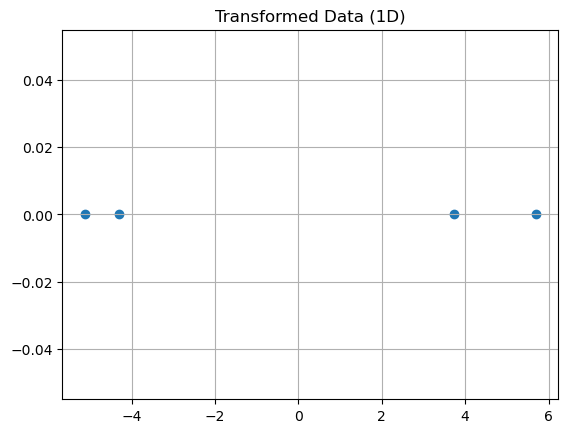

In [11]:
k = 1
top_k = eigenvectors[:, :k]
transformed_data = np.dot(top_k.T, np.array((x1_centered, x2_centered)))

plt.scatter(transformed_data, np.zeros_like(transformed_data))
plt.title("Transformed Data (1D)")
plt.grid()
plt.show()

In [28]:
data = pd.DataFrame()
data['x1'] = pd.DataFrame(x1)
data['x2'] = pd.DataFrame(x2)
data['Transformed'] = pd.DataFrame(transformed_data[0])
data

x1  x2  Transformed
0   4  11    -4.305187
1   8   4     3.736129
2  13   5     5.692828
3   7  14    -5.123769